# SuperStore Sales Analysis

Submitters: Tomer Orly

Project Objectives: SuperStore Sales Analysis

Link: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

Analysis Topic and Research Questions:
The goal of this project is to analyze SuperStore sales data to identify key trends, 
extract business insights, and improve decision-making processes. 
The analysis will address the following questions:

1. Profitability Analysis:
   
   - What percentage of total orders are not profitable?

3. Geographic Sales Distribution:
   - How many orders were placed in each country? (sorted in descending order)
   - How many countries have recorded sales?
   - Which are the top 10 most profitable countries? (sorted in descending order)

4. Customer Segment Insights:
   - How many orders were placed by each segment?
   - What is the distribution of orders across customer segments? (pie chart)
   - How has the number of orders by segment evolved over the years? (stack plot and stacked bar chart)
     
5. Shipping Performance:
   - What is the average waiting time (in days) for each shipping mode? (sorted in descending order)
   - What is the relationship between shipping mode and delivery time (waiting days)?

6. Sales Trends Over Time:
   - How many orders were placed each year?
   - How many orders were placed in each month for the years 2011-2014? (subplots)
   - What is the distribution of orders across years and quarters? (heatmap)
   - How do sales and profit amounts compare by year? (side-by-side bar chart)
     
7. High-Value Transactions:
   - What are the top 5 most profitable orders?
     
8. Product Category Performance:
   - How many orders were placed in each category, distributed by market? (sorted in descending order)
   - How many orders were placed in each category and subcategory? (sorted in descending order)
   - What is the average sales revenue for each subcategory?
     
9. Order Quantity Insights:
   - What is the frequency distribution of quantities per order? (histogram)
     
Tools and Techniques for Presenting Conclusions:
To conduct the analysis and present the conclusions, the following tools and techniques will be used:

- Python + pandas – for data cleaning, organization, and analysis.
- matplotlib, seaborn – for visualizing trends and insights.
- Jupyter Notebook – for interactive data exploration.
- Pivot Tables (in pandas) – for summarizing and comparing data.
- GroupBy and Aggregation – to analyze different trends and statistics.
- Sorting & Filtering – to highlight key data points and identify profitable transactions.
  

By utilizing these tools and techniques, we aim to derive clear insights into SuperStore's 
business performance and identify opportunities for improving profitability and strategic decision-making.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

In [2]:
pwd

'C:\\Users\\Tomer Orly\\Python Final Project'

In [3]:
df = pd.read_csv(r'C:\Users\Tomer Orly\Python Final Project\SuperStoreOrders.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

- order_id: Unique identifier for each order
- order_date: Date when the order was placed
- ship_date: Date when the order was shipped
- ship_mode: Shipping method used for the order ('Standard Class', 'Second Class', 'Same Day', 'First Class')
- customer_name: Name of the customer who placed the order
- segment: Customer segment ('Consumer', 'Home Office', 'Corporate')
- state: State where the order was placed
- country: Country where the order was placed
- market: Market category (e.g., APAC, EMEA)
- region: Geographical region of the order
- product_id: Unique identifier for each product
- category: Product category (e.g., Furniture, Office Supplies)
- sub_category: More specific classification within the category
- product_name: Name of the product ordered
- sales: Sales revenue generated from the order
- quantity: Number of units ordered
- discount: Discount applied to the order
- profit: Profit earned from the order
- shipping_cost: Cost of shipping the order
- order_priority: Priority level of the order (e.g., High, Low)
- year: Year when the order was placed


In [5]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [6]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014
51289,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3,3,0.2,-0.6048,0.17,Medium,2014


## Cleaning & Manipluating the Data

Some of the order_date values are in this pattern : 'dd/mm/yyyy', some are in this pattern : 'dd-mm-yyyy'.
We should use the format='mixed' and specify dayfirst=True to convert the column values successfully.

In [7]:
#Converting the order_date values to date type
df['orderDate']=pd.to_datetime(df['order_date'],format='mixed',dayfirst=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  object        
 2   ship_date       51290 non-null  object        
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  object        
 15  qu

In [9]:
#Converting the ship_date values to date type
df['shipDate']=pd.to_datetime(df['ship_date'],format='mixed',dayfirst=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  object        
 2   ship_date       51290 non-null  object        
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  object        
 15  qu

In [11]:
#Deleting the older columns (that their type is object and not datetime)
df.drop(columns=['order_date','ship_date'],inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   ship_mode       51290 non-null  object        
 2   customer_name   51290 non-null  object        
 3   segment         51290 non-null  object        
 4   state           51290 non-null  object        
 5   country         51290 non-null  object        
 6   market          51290 non-null  object        
 7   region          51290 non-null  object        
 8   product_id      51290 non-null  object        
 9   category        51290 non-null  object        
 10  sub_category    51290 non-null  object        
 11  product_name    51290 non-null  object        
 12  sales           51290 non-null  object        
 13  quantity        51290 non-null  int64         
 14  discount        51290 non-null  float64       
 15  pr

In [13]:
# Add a new column that calculates the amount of days the customer waited for his order
df['waitingDays']=(df['shipDate'] - df['orderDate']).dt.days

In [14]:
df.head()

,order_id,ship_mode,customer_name,segment,state,country,market,region,product_id,category,...,sales,quantity,discount,profit,shipping_cost,order_priority,year,orderDate,shipDate,waitingDays
0,AG-2011-2040,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,...,408,2,0.0,106.140,35.46,Medium,2011,2011-01-01,2011-01-06,5
1,IN-2011-47883,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,...,120,3,0.1,36.036,9.72,Medium,2011,2011-01-01,2011-01-08,7
2,HU-2011-1220,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,...,66,4,0.0,29.640,8.17,High,2011,2011-01-01,2011-01-05,4
3,IT-2011-3647632,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,...,45,3,0.5,-26.055,4.82,High,2011,2011-01-01,2011-01-05,4
4,IN-2011-47883,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,...,114,5,0.1,37.770,4.70,Medium,2011,2011-01-01,2011-01-08,7


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   ship_mode       51290 non-null  object        
 2   customer_name   51290 non-null  object        
 3   segment         51290 non-null  object        
 4   state           51290 non-null  object        
 5   country         51290 non-null  object        
 6   market          51290 non-null  object        
 7   region          51290 non-null  object        
 8   product_id      51290 non-null  object        
 9   category        51290 non-null  object        
 10  sub_category    51290 non-null  object        
 11  product_name    51290 non-null  object        
 12  sales           51290 non-null  object        
 13  quantity        51290 non-null  int64         
 14  discount        51290 non-null  float64       
 15  pr

In [16]:
# Add a new column that shows the month of making the order
df['month'] = df['orderDate'].dt.month

In [17]:
# Add a new column that shows the quarter of making the order
df['quarter'] = df['orderDate'].dt.quarter

In [18]:
df.head()

,order_id,ship_mode,customer_name,segment,state,country,market,region,product_id,category,...,discount,profit,shipping_cost,order_priority,year,orderDate,shipDate,waitingDays,month,quarter
0,AG-2011-2040,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,...,0.0,106.140,35.46,Medium,2011,2011-01-01,2011-01-06,5,1,1
1,IN-2011-47883,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,...,0.1,36.036,9.72,Medium,2011,2011-01-01,2011-01-08,7,1,1
2,HU-2011-1220,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,...,0.0,29.640,8.17,High,2011,2011-01-01,2011-01-05,4,1,1
3,IT-2011-3647632,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,...,0.5,-26.055,4.82,High,2011,2011-01-01,2011-01-05,4,1,1
4,IN-2011-47883,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,...,0.1,37.770,4.70,Medium,2011,2011-01-01,2011-01-08,7,1,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   ship_mode       51290 non-null  object        
 2   customer_name   51290 non-null  object        
 3   segment         51290 non-null  object        
 4   state           51290 non-null  object        
 5   country         51290 non-null  object        
 6   market          51290 non-null  object        
 7   region          51290 non-null  object        
 8   product_id      51290 non-null  object        
 9   category        51290 non-null  object        
 10  sub_category    51290 non-null  object        
 11  product_name    51290 non-null  object        
 12  sales           51290 non-null  object        
 13  quantity        51290 non-null  int64         
 14  discount        51290 non-null  float64       
 15  pr

In [20]:
#Show the unique values of the countries:
df.country.unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Canada',
       'New Zealand', 'Iraq', 'Philippines', 'United Kingdom', 'Malaysia',
       'Guatemala', 'Iran', 'Thailand', 'Tanzania', 'Brazil', 'Mexico',
       'Cuba', 'France', 'United States', 'Japan', 'Sudan', 'Taiwan',
       'Indonesia', 'Vietnam', 'Angola', 'China', 'Mozambique', 'Lebanon',
       'Singapore', 'Netherlands', 'Nigeria', 'Egypt', 'Venezuela',
       'South Africa', 'Spain', 'India', 'Turkey', 'Austria', 'Italy',
       'Germany', 'Nicaragua', 'Dominican Republic', 'El Salvador',
       'Denmark', 'Saudi Arabia', 'Zambia', 'Myanmar (Burma)', 'Russia',
       'Mongolia', 'Belgium', 'Kenya', 'Colombia', 'Estonia',
       'Madagascar', 'Portugal', 'Morocco', 'Sierra Leone', 'Norway',
       'Central African Republic', 'Czech Republic', 'Benin',
       'Bangladesh', 'Panama', 'Chile', 'South Korea', 'Switzerland',
       'Moldova', 'Uganda', 'Zimbabwe', 'Niger', 'Senegal', 'Hong Kong',
       'Democratic Republic o

In [21]:
#In country column, replace the 'America' values to 'United States' 
df['country'].replace({'America':'United States'},inplace=True)

C:\Users\Tomer Orly\AppData\Local\Temp\ipykernel_5516\3762662926.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].replace({'America':'United States'},inplace=True)


In [22]:
#Check if the changes were successfully done:
df.country.unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Canada',
       'New Zealand', 'Iraq', 'Philippines', 'United Kingdom', 'Malaysia',
       'Guatemala', 'Iran', 'Thailand', 'Tanzania', 'Brazil', 'Mexico',
       'Cuba', 'France', 'United States', 'Japan', 'Sudan', 'Taiwan',
       'Indonesia', 'Vietnam', 'Angola', 'China', 'Mozambique', 'Lebanon',
       'Singapore', 'Netherlands', 'Nigeria', 'Egypt', 'Venezuela',
       'South Africa', 'Spain', 'India', 'Turkey', 'Austria', 'Italy',
       'Germany', 'Nicaragua', 'Dominican Republic', 'El Salvador',
       'Denmark', 'Saudi Arabia', 'Zambia', 'Myanmar (Burma)', 'Russia',
       'Mongolia', 'Belgium', 'Kenya', 'Colombia', 'Estonia',
       'Madagascar', 'Portugal', 'Morocco', 'Sierra Leone', 'Norway',
       'Central African Republic', 'Czech Republic', 'Benin',
       'Bangladesh', 'Panama', 'Chile', 'South Korea', 'Switzerland',
       'Moldova', 'Uganda', 'Zimbabwe', 'Niger', 'Senegal', 'Hong Kong',
       'Democratic Republic o

In [23]:
#Delete the rows that contains 'EMEA' in the country:
mask= df['country']=='EMEA'
mask_index=df[mask].index
df.drop(mask_index,inplace=True)

In [24]:
#Check if the changes were successfully done:
df.country.unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Canada',
       'New Zealand', 'Iraq', 'Philippines', 'United Kingdom', 'Malaysia',
       'Guatemala', 'Iran', 'Thailand', 'Tanzania', 'Brazil', 'Mexico',
       'Cuba', 'France', 'United States', 'Japan', 'Sudan', 'Taiwan',
       'Indonesia', 'Vietnam', 'Angola', 'China', 'Mozambique', 'Lebanon',
       'Singapore', 'Netherlands', 'Nigeria', 'Egypt', 'Venezuela',
       'South Africa', 'Spain', 'India', 'Turkey', 'Austria', 'Italy',
       'Germany', 'Nicaragua', 'Dominican Republic', 'El Salvador',
       'Denmark', 'Saudi Arabia', 'Zambia', 'Myanmar (Burma)', 'Russia',
       'Mongolia', 'Belgium', 'Kenya', 'Colombia', 'Estonia',
       'Madagascar', 'Portugal', 'Morocco', 'Sierra Leone', 'Norway',
       'Central African Republic', 'Czech Republic', 'Benin',
       'Bangladesh', 'Panama', 'Chile', 'South Korea', 'Switzerland',
       'Moldova', 'Uganda', 'Zimbabwe', 'Niger', 'Senegal', 'Hong Kong',
       'Democratic Republic o

In [25]:
#Show the amount of orders by markets sorted descending:
df.groupby('market')['order_id'].count().sort_values(ascending=False).to_frame()

,order_id
market,
APAC,11002
LATAM,10294
EU,10000
US,9994
EMEA,5029
Africa,4587
Canada,384


In [26]:
# We see that we have unclear data - We should combine US and Canada as APAC, EU and Africa as EMEA

In [27]:
df['market'].replace({'US':'APAC','Canada':'APAC','EU':'EMEA','Africa':'EMEA'},inplace=True)

C:\Users\Tomer Orly\AppData\Local\Temp\ipykernel_5516\1849276920.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['market'].replace({'US':'APAC','Canada':'APAC','EU':'EMEA','Africa':'EMEA'},inplace=True)


In [28]:
# Check if the data transfered successfully :
df.groupby('market')['order_id'].count().sort_values(ascending=False).to_frame()

,order_id
market,
APAC,21380
EMEA,19616
LATAM,10294


In [29]:
#Delete the region column
df=df.drop('region',axis=1)

In [30]:
# Check if the region column has been deleted successfully :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   ship_mode       51290 non-null  object        
 2   customer_name   51290 non-null  object        
 3   segment         51290 non-null  object        
 4   state           51290 non-null  object        
 5   country         51290 non-null  object        
 6   market          51290 non-null  object        
 7   product_id      51290 non-null  object        
 8   category        51290 non-null  object        
 9   sub_category    51290 non-null  object        
 10  product_name    51290 non-null  object        
 11  sales           51290 non-null  object        
 12  quantity        51290 non-null  int64         
 13  discount        51290 non-null  float64       
 14  profit          51290 non-null  float64       
 15  sh

In [31]:
#Convert Sales column from object to float:
#We should clean the ',' from it too
df["sales"] = df["sales"].str.replace(",", "").astype(float)

In [32]:
#Check the type of 'sales' column :
df['sales'].dtype

dtype('float64')

In [33]:
df['sales'].head()

0    408.0
1    120.0
2     66.0
3     45.0
4    114.0
Name: sales, dtype: float64

## Descriptive Statistics

In [34]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year,orderDate,shipDate,waitingDays,month,quarter
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290,51290,51290.000000,51290.000000,51290.000000
mean,246.498440,3.476545,0.142908,28.641740,26.375915,2012.777208,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,3.969370,7.522636,2.793235
min,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000,2011-01-01 00:00:00,2011-01-03 00:00:00,0.000000,1.000000,1.000000
25%,31.000000,2.000000,0.000000,0.000000,2.610000,2012.000000,2012-06-19 00:00:00,2012-06-23 00:00:00,3.000000,5.000000,2.000000
50%,85.000000,3.000000,0.000000,9.240000,7.790000,2013.000000,2013-07-08 00:00:00,2013-07-12 00:00:00,4.000000,8.000000,3.000000
75%,251.000000,5.000000,0.200000,36.810000,24.450000,2014.000000,2014-05-22 00:00:00,2014-05-26 00:00:00,5.000000,10.000000,4.000000
max,22638.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000,2014-12-31 00:00:00,2015-01-07 00:00:00,7.000000,12.000000,4.000000
std,487.567175,2.278766,0.212280,174.424113,57.296804,1.098931,NaN,NaN,1.729437,3.300056,1.066015


In [35]:
df.describe(include='object')

,order_id,ship_mode,customer_name,segment,state,country,market,product_id,category,sub_category,product_name,order_priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,4,795,3,1094,147,3,10292,3,17,3788,4
top,CA-2014-100111,Standard Class,Muhammed Yedwab,Consumer,California,United States,APAC,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,14,30775,108,26518,2001,9994,21380,35,31273,6152,227,29433


## Advanced Analysis

In [36]:
# Show the percentage of orders that aren't profitable :
no_p = df['profit']<0
no_p_amount = len(df[no_p])
no_p_amount
total = len(df['profit'])
total
print('Percentage of unprofitable orders :',round((no_p_amount / total)*100,2), '%')

Percentage of unprofitable orders : 24.46 %


In [37]:
#Show the amount of orders by countries sorted descending:
df.groupby('country')['order_id'].count().sort_values(ascending=False).to_frame()

,order_id
country,
United States,9994
Australia,2837
France,2827
Mexico,2644
Germany,2065
...,...
Eritrea,2
Burundi,2
Chad,2


In [38]:
#Show the amount of countries:
df.country.nunique()

147

In [39]:
#Show the order number by each segment:
df.groupby('segment')['order_id'].count().sort_values(ascending=False).to_frame()

,order_id
segment,
Consumer,26518
Corporate,15429
Home Office,9343


In [40]:
#Show the average waiting time (days) by each ship_mode sorted descending:
df.groupby('ship_mode')['waitingDays'].mean().sort_values(ascending=False)

ship_mode
Standard Class    4.998018
Second Class      3.230187
First Class       2.181746
Same Day          0.037394
Name: waitingDays, dtype: float64

In [41]:
#Show Orders Amount By Each Year and Quarter:
df.groupby(['year','quarter'])['order_id'].count().to_frame()

order_id
year quarter          
2011 1            1350
     2            2047
     3            2425
     4            3176
2012 1            1630
     2            2633
     3            2965
     4            3734
2013 1            2080
     2            3372
     3            4049
     4            4298
2014 1            2742
     2            4083
     3            4780
     4            5926

In [42]:
#Show the top 5 most valuable orders (highest profits):
top_orders_ids= df['profit'].nlargest(5).index
df.loc[top_orders_ids]

,order_id,ship_mode,customer_name,segment,state,country,market,product_id,category,sub_category,...,discount,profit,shipping_cost,order_priority,year,orderDate,shipDate,waitingDays,month,quarter
29530,CA-2013-118689,Standard Class,Tamara Chand,Corporate,Indiana,United States,APAC,TEC-CO-10004722,Technology,Copiers,...,0.0,8399.9760,349.07,Medium,2013,2013-10-03,2013-10-10,7,10,4
36239,CA-2014-140151,First Class,Raymond Buch,Consumer,Washington,United States,APAC,TEC-CO-10004722,Technology,Copiers,...,0.0,6719.9808,20.00,Medium,2014,2014-03-24,2014-03-26,2,3,1
48097,CA-2014-166709,Standard Class,Hunter Lopez,Consumer,Delaware,United States,APAC,TEC-CO-10004722,Technology,Copiers,...,0.0,5039.9856,363.19,Medium,2014,2014-11-18,2014-11-23,5,11,4
33011,CA-2013-117121,Standard Class,Adrian Barton,Consumer,Michigan,United States,APAC,OFF-BI-10000545,Office Supplies,Binders,...,0.0,4946.3700,498.70,Medium,2013,2013-12-18,2013-12-22,4,12,4
5522,CA-2011-116904,Standard Class,Sanjit Chand,Consumer,Minnesota,United States,APAC,OFF-BI-10001120,Office Supplies,Binders,...,0.0,4630.4755,655.61,Medium,2011,2011-09-23,2011-09-28,5,9,3


In [43]:
#Show the amount of orders by each Category distributed by markets sorted descending:
df.groupby(['market','category'])['order_id'].count().sort_values(ascending=False).to_frame()

order_id
market category                 
EMEA   Office Supplies     12931
APAC   Office Supplies     12480
LATAM  Office Supplies      5862
APAC   Furniture            4592
       Technology           4308
EMEA   Technology           3783
       Furniture            2902
LATAM  Furniture            2382
       Technology           2050

In [44]:
# Show the amount of orders by category and sub category sorted descending:
df.groupby(['category','sub_category'])['order_id'].count().sort_values(ascending=False)

category         sub_category
Office Supplies  Binders         6152
                 Storage         5059
                 Art             4883
                 Paper           3538
Furniture        Chairs          3434
Technology       Phones          3357
Furniture        Furnishings     3170
Technology       Accessories     3075
Office Supplies  Labels          2606
                 Envelopes       2435
                 Supplies        2425
                 Fasteners       2420
Furniture        Bookcases       2411
Technology       Copiers         2223
Office Supplies  Appliances      1755
Technology       Machines        1486
Furniture        Tables           861
Name: order_id, dtype: int64

In [45]:
# Show the top 10 country that makes the most profits sorted descending:
df.groupby('country')['profit'].sum().head(10).sort_values(ascending=False)

country
Australia      105484.96300
Austria         24341.70000
Algeria          9106.50000
Angola           6494.97000
Afghanistan      5460.30000
Azerbaijan       1831.05000
Albania           709.32000
Armenia            69.09000
Bahrain            12.84000
Argentina      -18693.79672
Name: profit, dtype: float64

## Visualizations

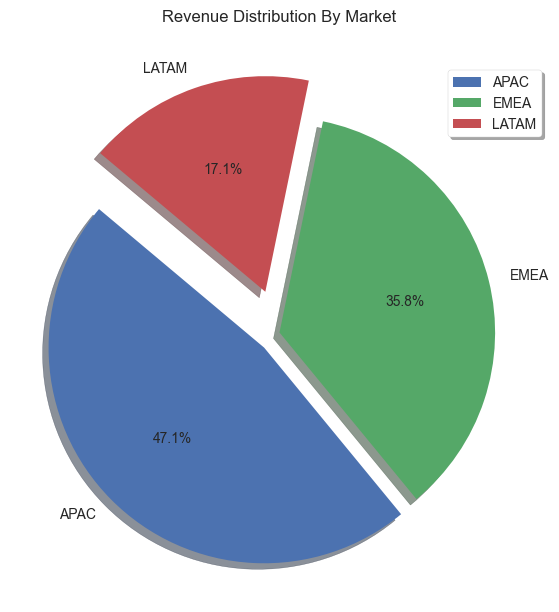

In [46]:
# Pie chart that shows the amount of Revenue by each market:
plt.style.use('seaborn-v0_8')
sales_by_market= df.groupby('market')['sales'].sum()
sales_by_market
plt.figure(figsize=(9,7))
plt.pie(sales_by_market,labels=sales_by_market.index, autopct="%1.1f%%",explode=(0.1,0,0.2),shadow=True, startangle=140)
plt.title("Revenue Distribution By Market",pad=30)
plt.legend(loc="upper right", shadow=True, frameon=True, facecolor="white")
plt.show()

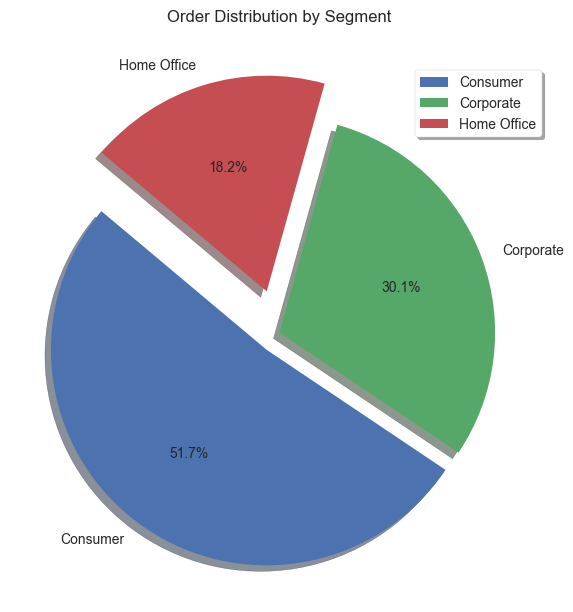

In [47]:
# Pie chart that shows the distribution of orders by segments:
sales_by_segment= df.groupby('segment')['order_id'].count()
sales_by_segment
plt.figure(figsize=(9,7))
plt.pie(sales_by_segment,labels=sales_by_segment.index, autopct="%1.1f%%",explode=(0.1,0,0.2),shadow=True, startangle=140)
plt.title("Order Distribution by Segment",pad=30)
plt.legend(loc="upper right", shadow=True, frameon=True, facecolor="white")
plt.show()

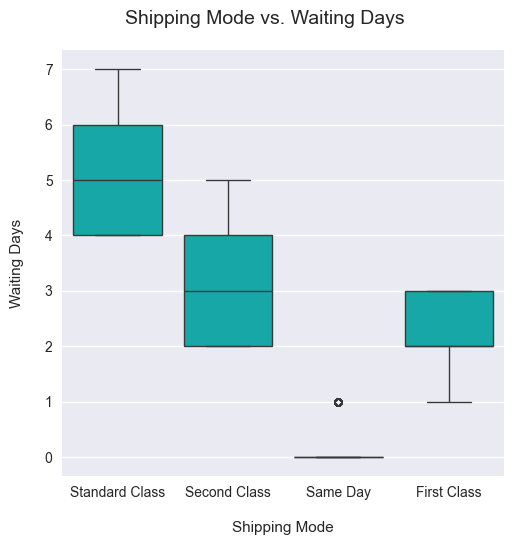

In [48]:
# Show the connection between shipping mode and delivery time (waiting days) :
g = sb.catplot(x="ship_mode", y="waitingDays", kind="box", data=df,color='c')
g.fig.suptitle("Shipping Mode vs. Waiting Days", fontsize=14, y=1.05)
g.set_axis_labels("Shipping Mode", "Waiting Days", labelpad=15) 

plt.show()

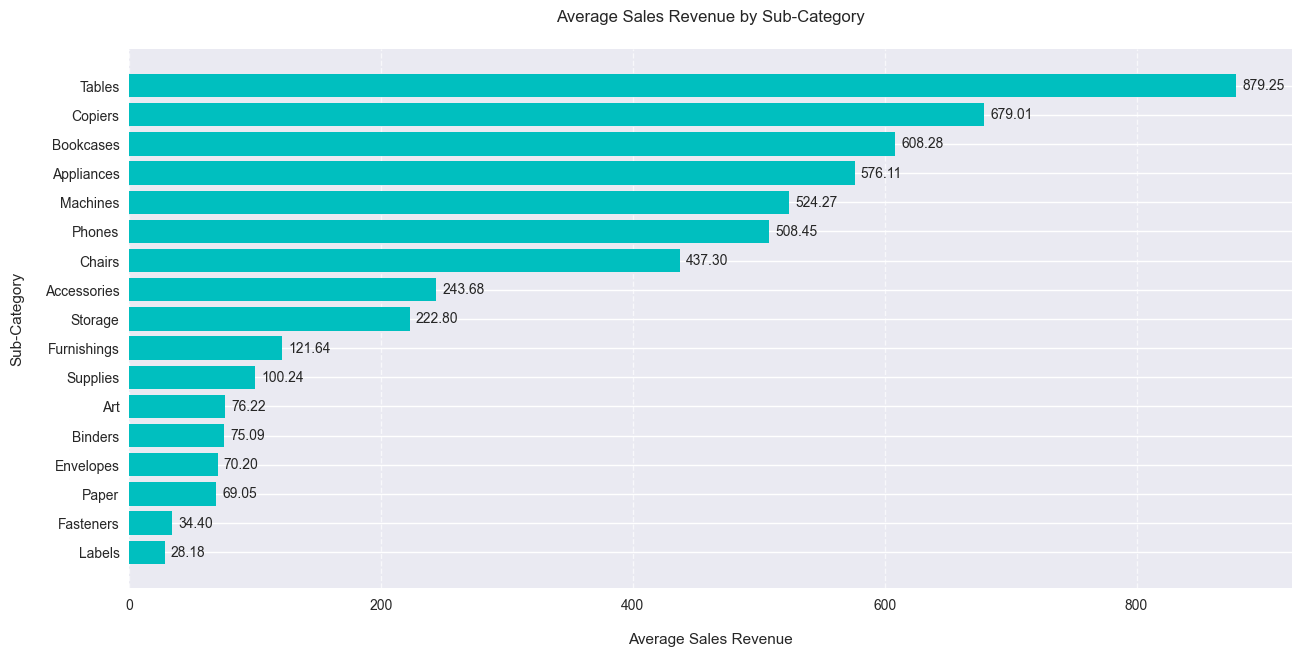

In [49]:
# Show to average sales revenue by each sub - category :
avg_sales_sub = df.groupby('sub_category')['sales'].mean().sort_values()
plt.figure(figsize=(15, 7))
bars= plt.barh(avg_sales_sub.index, avg_sales_sub.values, color='c')

# Add labels at the end of each bar
for bar in bars:
    plt.text(bar.get_width() + 5,  # x position (slightly offset from bar)
             bar.get_y() + bar.get_height()/2,  # y position (centered)
             f'{bar.get_width():,.2f}',  # Format label (2 decimal places)
             va='center', fontsize=10)

    
plt.xlabel("Average Sales Revenue",labelpad=15)
plt.ylabel("Sub-Category",labelpad=15)
plt.title("Average Sales Revenue by Sub-Category",pad=20)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

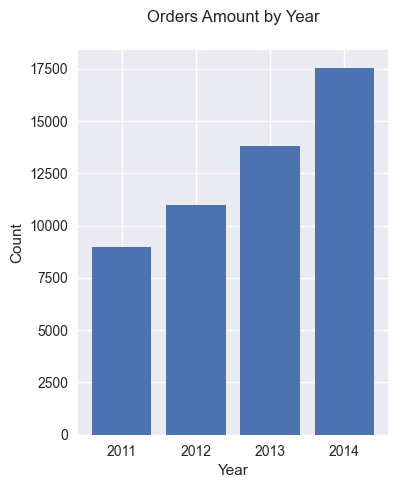

In [50]:
#Show the amount of orders by years:
mask = df.groupby('year')['order_id'].count()
plt.figure(figsize=(4, 5))
plt.bar(x=mask.index, height=mask.values) 
plt.xlabel("Year")
plt.ylabel("Count")
plt.title('Orders Amount by Year',pad=20)
plt.show()

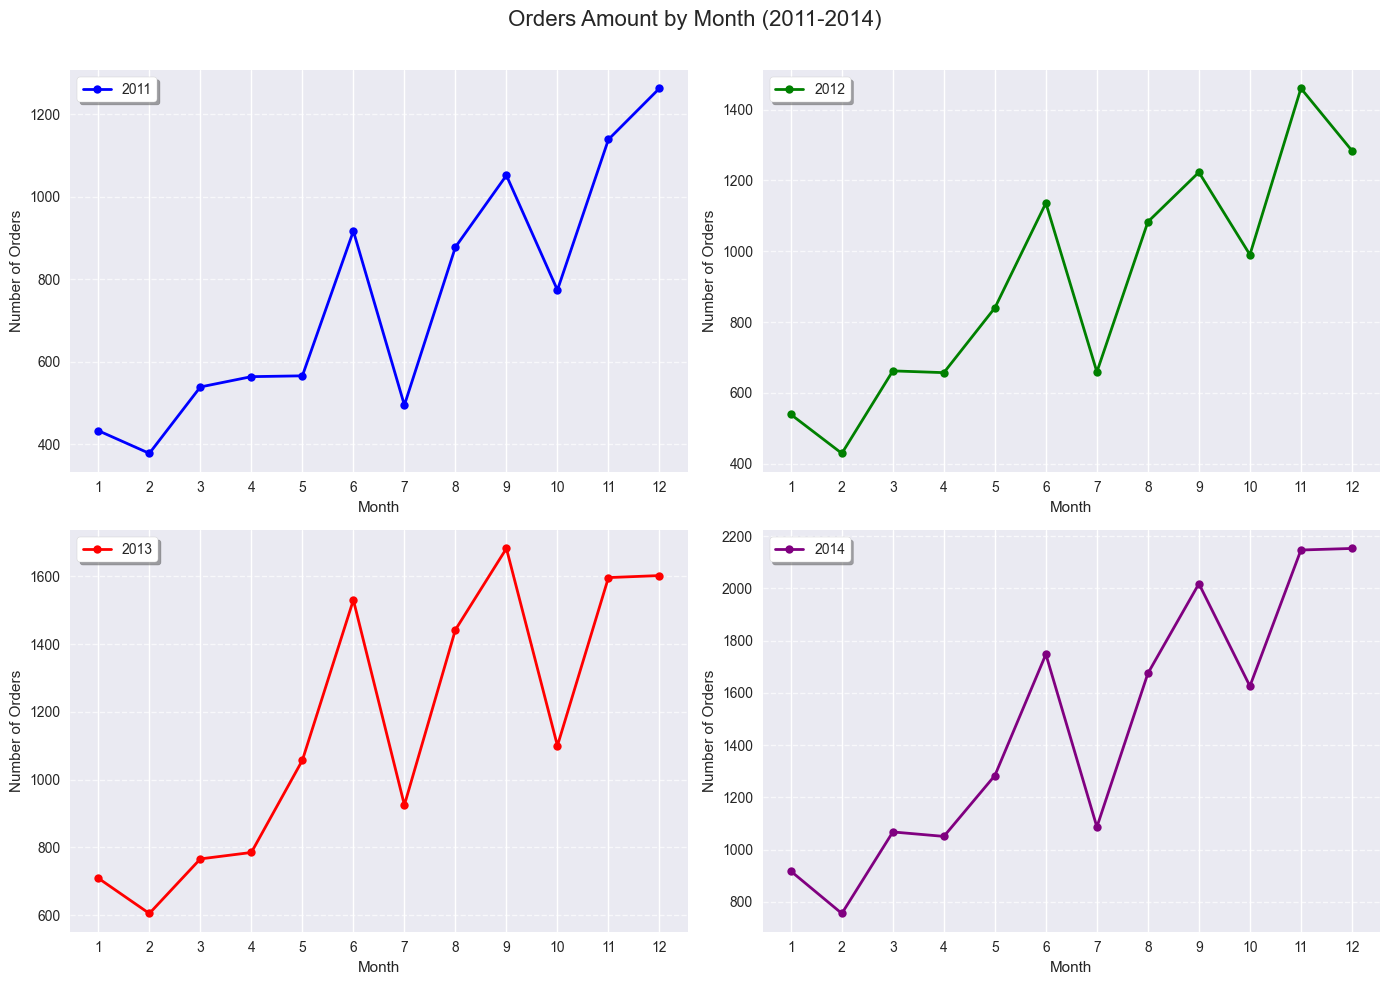

In [51]:
# Show the amount of orders by months for each year (2011-2014) (subplots):

# Create a figure and set a main title
plt.figure(figsize=(14, 10))
plt.suptitle("Orders Amount by Month (2011-2014)", fontsize=16)

# Plot for the year 2011
plt.subplot(2, 2, 1)
df_2011 = df[df['year'] == 2011]
orders_2011 = df_2011.groupby('month')['order_id'].count()
plt.plot(orders_2011.index, orders_2011.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=6, label="2011")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.xticks(range(1, 13))
plt.legend(loc="upper left", shadow=True, frameon=True, facecolor="white")

# Plot for the year 2012
plt.subplot(2, 2, 2)
df_2012 = df[df['year'] == 2012]
orders_2012 = df_2012.groupby('month')['order_id'].count()
plt.plot(orders_2012.index, orders_2012.values, marker='o', color='g', linestyle='-', linewidth=2, markersize=6, label="2012")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.xticks(range(1, 13))
plt.legend(loc="upper left", shadow=True, frameon=True, facecolor="white")

# Plot for the year 2013
plt.subplot(2, 2, 3)
df_2013 = df[df['year'] == 2013]
orders_2013 = df_2013.groupby('month')['order_id'].count()
plt.plot(orders_2013.index, orders_2013.values, marker='o', color='r', linestyle='-', linewidth=2, markersize=6, label="2013")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.xticks(range(1, 13))
plt.legend(loc="upper left", shadow=True, frameon=True, facecolor="white")

# Plot for the year 2014
plt.subplot(2, 2, 4)
df_2014 = df[df['year'] == 2014]
orders_2014 = df_2014.groupby('month')['order_id'].count()
plt.plot(orders_2014.index, orders_2014.values, marker='o', color='purple', linestyle='-', linewidth=2, markersize=6, label="2014")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.xticks(range(1, 13))
plt.legend(loc="upper left", shadow=True, frameon=True, facecolor="white")

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the figure to give space below for the legend

# Show the plot
plt.show()


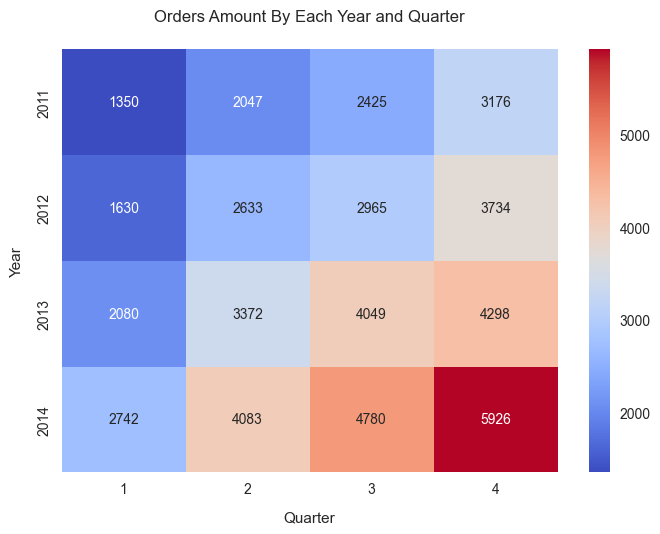

In [52]:
#Heatmap that shows the Orders Amount By Each Year and Quarter:
pvt = df.pivot_table(index="year", columns="quarter", values="order_id", aggfunc="count")
plt.title("Orders Amount By Each Year and Quarter",pad=20)
sb.heatmap(data=pvt, annot=True,fmt="d", cmap="coolwarm")
plt.xlabel("Quarter",labelpad=10)
plt.ylabel("Year",labelpad=10)
plt.show()

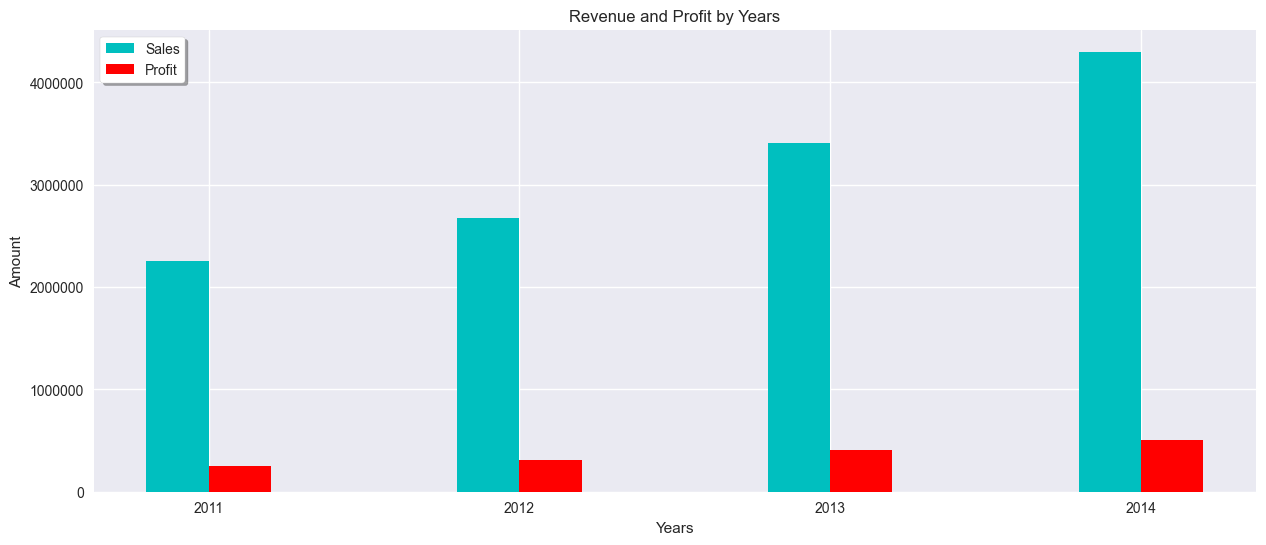

In [53]:
# Show sales and profit amounts by year, with bars for each metric displayed side-by-side:
mask = df.groupby(['year'])[['sales','profit']].sum()
plt.figure(figsize=(15,6))

# Bar for 'sales' with width -0.2 (aligning to the left)
plt.bar(mask.index, mask['sales'], width=-0.2, color='c', align='edge', label='Sales')

# Bar for 'profit' with width 0.2 (aligning to the right)
plt.bar(mask.index, mask['profit'], width=0.2, color='r', align='edge', label='Profit')

# Make sure x-ticks are integers
plt.xticks(mask.index.astype(int))

# Avoid scientific notation on the y-axis
plt.ticklabel_format(axis='y', style='plain')

plt.title("Revenue and Profit by Years")
plt.xlabel("Years")
plt.ylabel('Amount')
plt.legend(loc="upper left", shadow=True, frameon=True, facecolor="white")

plt.show()


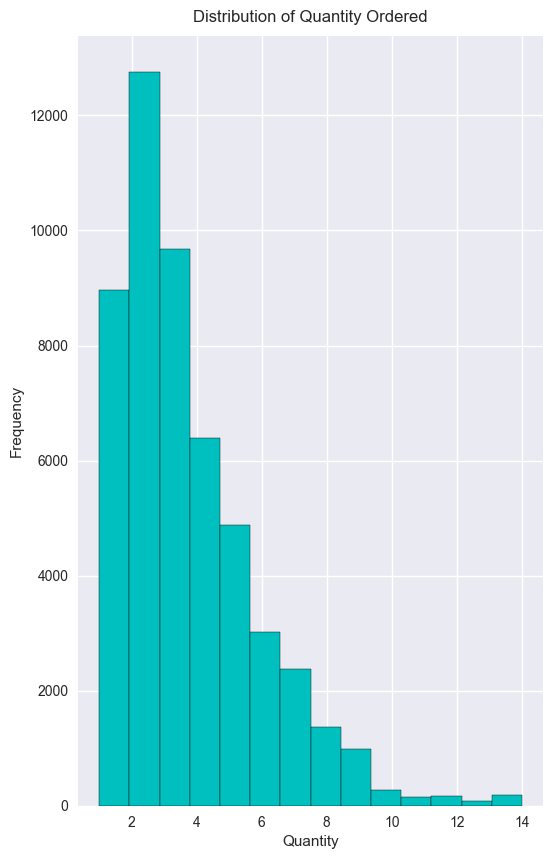

In [54]:
# Show an histogram of the quatities frequency by each order:
plt.figure(figsize=(6,10))
plt.hist(df['quantity'], bins=14, color='c', edgecolor='black')

# Add the title and labels
plt.title('Distribution of Quantity Ordered',pad=10)
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Show the plot
plt.show()


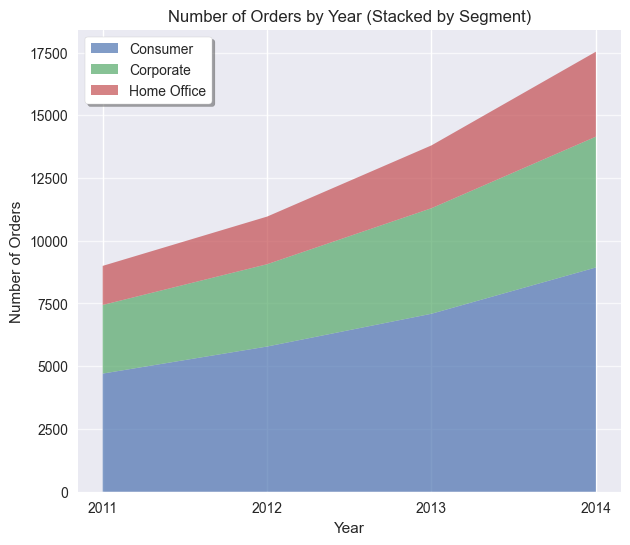

In [55]:
# Show the number of orders by year, stacked by segment using a stack plot

# Group by year and segment, counting the number of orders
orders_by_segment = df.groupby(['year', 'segment'])['order_id'].count().unstack()

# Define years and segments
years = orders_by_segment.index.astype(int) 
segments = orders_by_segment.columns

# Plot stackplot
plt.figure(figsize=(7, 6))
plt.stackplot(years, orders_by_segment.T, labels=segments, alpha=0.7)

# Formatting
plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Year (Stacked by Segment)")
plt.legend(loc="upper left", shadow=True, frameon=True, facecolor="white")
plt.grid(axis='y', alpha=0.7)
plt.xticks(ticks=years, labels=years.astype(int))

plt.show()


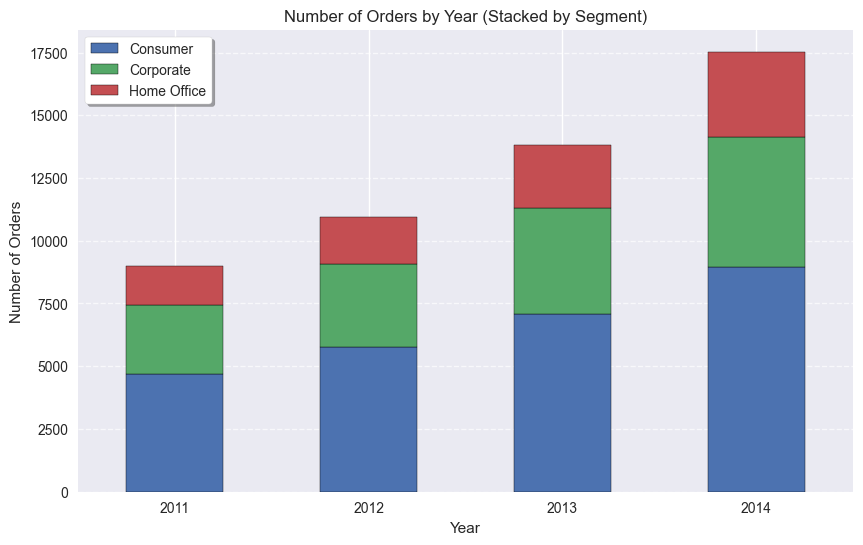

In [56]:
# Show the number of orders by year, stacked by segment using a stack plot bars
# Group by year and segment, counting the number of orders
orders_by_segment = df.groupby(['year', 'segment'])['order_id'].count().unstack()

# Convert years to integer
years = orders_by_segment.index.astype(int)  
segments = orders_by_segment.columns

# Create stacked bar plot
plt.figure(figsize=(10, 6))
orders_by_segment.plot(kind='bar', stacked=True, edgecolor='black', ax=plt.gca())

# Formatting
plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.title("Number of Orders by Year (Stacked by Segment)")
plt.legend(loc="upper left", shadow=True, frameon=True, facecolor="white")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure x-axis ticks are displayed as integers
plt.xticks(range(len(years)), years, rotation=0)  # Keep years as int

plt.show()


Business and Research Insights:

1. Market and Product Scope – The dataset includes:
    - 51,290 total orders
    - Average revenue per order: 246.50 USD
    - Average profit per order: 28.64 USD
    - 147 countries
    - 3 segments, 3 markets, 3 main categories
    - 17 subcategories and 3,788 unique products
    These numbers provide a broad business perspective, helping in understanding global demand distribution, 
    product variety, and revenue contributions.

2. APAC as the Primary Market – The dominance of APAC suggests a strong regional demand, 
   indicating potential for further market expansion, localized marketing strategies, 
   and inventory optimization to cater to regional preferences.

3. Consumer Segment Drives Sales – The Consumer segment is the most significant contributor to sales growth, 
   emphasizing the need for targeted promotions, loyalty programs, and product offerings 
   tailored to individual consumers rather than businesses or corporate clients.

4. Shipping Performance Insights – Standard Class shipping takes 4-7 days, while First Class takes 1-3 days. 
   This suggests that improving logistics and optimizing Standard Class shipping time 
   could enhance customer satisfaction. Additionally, premium shipping (First Class) 
   is considerably faster, justifying potential pricing adjustments for express delivery services.

5. High-Value Product Categories – The top three revenue-generating sub-categories—Tables, Copiers, and Bookcases—
   highlight key product areas that should be prioritized for inventory management, 
   pricing strategies, and promotional campaigns.

6. Yearly Growth in Orders – The consistent rise in the number of orders each year signals a healthy business trajectory, 
   reinforcing the importance of maintaining supply chain efficiency, customer service quality, 
   and data-driven demand forecasting.

7. Seasonal Consumer Behavior – The increased number of orders in the second half of the year suggests a seasonal 
   purchasing pattern, likely influenced by end-of-year sales, holiday shopping, and corporate budget allocations. 
   Strategic marketing efforts should focus on Q3 and Q4 to maximize revenue.

8. Peak Sales Period: Q4 2014 – Q4 2014 marked the highest revenue and profit period, emphasizing the importance 
   of end-of-year promotions, holiday campaigns, and inventory stocking strategies to capitalize on peak demand.

9. 2014 as the Most Profitable Year – The highest recorded revenue and profit in 2014 may indicate successful 
   business strategies during that period, including product pricing, discount strategies, or market conditions 
   that could be analyzed and replicated for future growth.

10. Optimal Order Quantity Per Transaction – With most orders containing two products, cross-selling and bundling 
    strategies can be effective in increasing the average order value, encouraging customers to purchase complementary items.

11. Growth Across All Segments – While all segments are experiencing an increase in orders, the Consumer segment 
    remains the most dominant, reinforcing the need for continued investment in consumer-targeted marketing 
    and personalized promotions.
